In [1]:
import glob
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import timedelta, datetime
#import contextily as ctx

# Open and visualize 1 hour aggregates
### starting with AOD, QA2 
# Trying FRP aggregate

In [4]:
hh = '00'
dd = 259
month = 9
day_MUSICAv0 = 16
day = 15

In [6]:
FILE=f"/home/svisaga/clavrx/aerdt/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_aerdt.nc"
# Open the root group
group_name = 'aerdt_aod_qa2'
C = xarray.open_dataset(FILE, group=group_name)
#C['Mean'].longitude
ds_aod = C
aod = ds_aod['Mean'].data
        # Create a new DataArray for AOD with lon and lat as coordinates
longitude = np.linspace(-180, 180, 1440)  # Longitudes from -180 to 180 with 1440 points
latitude = np.linspace(-90, 90, 720)     # Latitudes from -90 to 90 with 720 points

lat_points = 158 
lon_points = 186
loni = 93.94023627519107
lone = 140.22237665045168
longitude_ = np.linspace(loni,lone,lon_points)
lati = -19.15159944367177
late = 20.152990264255905
latitude_ = np.linspace(lati,late,lat_points)


aodqa_with_coords = xarray.DataArray(
    data=aod.T,  # AOD data values
    dims=['latitude', 'longitude'],   # Specify the dimension names
    coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
    name='aod_Mean'  # You can name the DataArray
)
aodqa_with_coords = aodqa_with_coords.sel(latitude=slice(-19.1516, 20.15299+0.25 ),longitude=slice(93.94024-0.25, 140.22238+0.25))
aodqa_with_coords

<xarray.DataArray 'aod_Mean' (latitude: 158, longitude: 186)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.49275   , 0.4982    ,
        0.41      ],
       [       nan,        nan,        nan, ..., 0.38133333, 0.36075   ,
        0.3515    ],
       [       nan,        nan,        nan, ..., 0.34976923, 0.33854546,
        0.3204    ]])
Coordinates:
  * longitude  (longitude) float64 93.94 94.19 94.44 94.69 ... 139.7 140.0 140.2
  * latitude   (latitude) float64 -19.15 -18.9 -18.65 -18.4 ... 19.65 19.9 20.15

In [7]:
#for figure labels
file_date_str = FILE.split('/')[-1].replace('.nc', '') 
# Creating lon and lat values corresponding to the dimensions of the data (lon: 1440, lat: 720)



In [8]:
FILE_MUSICAv0 = f"/home/svisaga/MUSICA_ANALYSES/MUSICAv0_AOD_U_V_regridded/MUSICAv0_AOD_U_V_SEAcut_25km_2019-{month:02}-{day_MUSICAv0:02}-03600.nc"
C_MUSICAv0 = xarray.open_dataset(FILE_MUSICAv0)
C_MUSICAv0 = C_MUSICAv0.sel(time=f'2019-{month:02}-{day_MUSICAv0:02}T00:30:00.000000000')
aod_musicav0 = C_MUSICAv0['AODVIS']
aod_musicav0
C_MUSICAv0

<xarray.Dataset>
Dimensions:  (lat: 158, lon: 186, lev: 32)
Coordinates:
  * lat      (lat) float32 -19.15 -18.9 -18.65 -18.4 ... 19.4 19.65 19.9 20.15
  * lon      (lon) float32 93.94 94.19 94.44 94.69 ... 139.5 139.7 140.0 140.2
  * lev      (lev) float32 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
    time     datetime64[ns] 2019-09-16T00:30:00
Data variables:
    AODVIS   (lat, lon) float32 ...
    U        (lat, lon, lev) float32 ...
    V        (lat, lon, lev) float32 ...

In [9]:
for latitude in aodqa_with_coords.latitude:
    for longitude in aodqa_with_coords.longitude:
        if np.isnan(aodqa_with_coords.sel(latitude=latitude, longitude=longitude)):
            aod_musicav0.loc[dict(lat=latitude, lon=longitude)] = np.nan

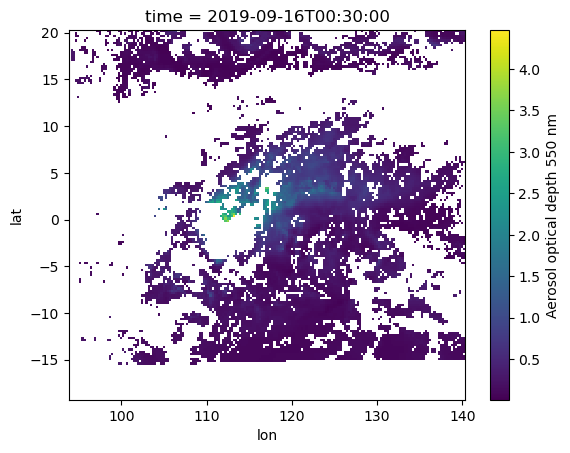

In [10]:
aod_musicav0.plot.pcolormesh()

In [11]:
-19.1516 +18.976912

-0.17468799999999973

In [ ]:
'''
#group_name_list = ['aod_muri_unfiltered', 'aod_muri_qa1', 'aod_muri_qa2', 'aod_muri_qa3', 'aod_muri_qa4']
group_name_list = ['aod_muri_qa2']
for group_name in group_name_list:
    for i in range(0, 9, 1):
    #for i in range(0, 1, 1):
        hh = f"{i:02d}"
        FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd:02}T{hh}00_0_25deg_campex_muri.nc"
        # Open the root group
        C = xarray.open_dataset(FILE)
        # Open a specific group, e.g., 'group_name'
        print(group_name)
        ds_aod = xarray.open_dataset(FILE, group=group_name)
        # Access an attribute (e.g., description)
        description = C.attrs.get("YAML_config")
        #for figure labels
        file_date_str = FILE.split('/')[-1].replace('.nc', '') 
        #print(ds_aod)
        aod = ds_aod['Mean'].data
        longitude = np.linspace(-180, 180, 1440)  # Longitudes from -180 to 180 with 1440 points
        latitude = np.linspace(-90, 90, 720)     # Latitudes from -90 to 90 with 720 points


        aodqa_with_coords = xarray.DataArray(
            data=aod.T,  # AOD data values
            dims=['latitude', 'longitude'],   # Specify the dimension names
            coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
            name='aod_Mean'  # You can name the DataArray
        )
        aodqa_with_coords = aodqa_with_coords.sel(latitude=slice(-19.1516, 20.15299+0.25 ),longitude=slice(93.94024-0.25, 140.22238+0.25))
        
        FILE_MUSICAv0 = f"/home/svisaga/MUSICA_ANALYSES/MUSICAv0_AOD_U_V_regridded/MUSICAv0_AOD_U_V_SEAcut_25km_2019-{month:02}-{day_MUSICAv0:02}-03600.nc"
        C_MUSICAv0 = xarray.open_dataset(FILE_MUSICAv0)
        time_ = f'2019-{month:02}-{day_MUSICAv0:02}T{hh}:30:00.000000000'
        C_MUSICAv0 = C_MUSICAv0.sel(time=time_)
        #C_MUSICAv0 = C_MUSICAv0.rename({"lat": "latitude", "lon": "longitude"})
        
        aod_musicav0 = C_MUSICAv0['AODVIS']

        for latitude in aodqa_with_coords.latitude:
            for longitude in aodqa_with_coords.longitude:
                if np.isnan(aodqa_with_coords.sel(latitude=latitude, longitude=longitude)):
                    aod_musicav0.loc[dict(lat=latitude, lon=longitude)] = np.nan

        ################################################################
        ################################################################
        ################################################################
        fig = plt.figure(figsize=(10, 8))
        pla_proj = ccrs.PlateCarree()
        ax = plt.axes(projection=pla_proj)

        longitude_min = 90
        longitude_max = 140
        latitude_min = -15  # Adjust as necessary
        latitude_max = 30   # Adjust as necessary
        ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

        aodqa_with_coords.plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')

        ax.coastlines(resolution='50m', color='black', linewidth=2)
        ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

        plt.title(f'Himawari AHI MURI AOD\n{file_date_str}_{group_name}')
        plt.savefig(f'img/{file_date_str}_aod_{group_name}.png',dpi=300)
        ################################################################
        ################################################################
        ################################################################
        fig = plt.figure(figsize=(10, 8))
        pla_proj = ccrs.PlateCarree()
        ax = plt.axes(projection=pla_proj)

        longitude_min = 90
        longitude_max = 140
        latitude_min = -15
        latitude_max = 30
        ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

        #aod_musicav0_with_coords.where(aodqa_with_coords >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')
        aod_musicav0.plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')
        ax.coastlines(resolution='50m', color='black', linewidth=2)
        ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

        plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
        plt.savefig(f'img/{file_date_str}_aodmusicav0_all_{group_name}.png',dpi=300)
        ################################################################
        ################################################################
        ################################################################
'''

'\n#group_name_list = [\'aod_muri_unfiltered\', \'aod_muri_qa1\', \'aod_muri_qa2\', \'aod_muri_qa3\', \'aod_muri_qa4\']\ngroup_name_list = [\'aod_muri_qa2\']\nfor group_name in group_name_list:\n    for i in range(0, 9, 1):\n    #for i in range(0, 1, 1):\n        hh = f"{i:02d}"\n        FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd:02}T{hh}00_0_25deg_campex_muri.nc"\n        # Open the root group\n        C = xarray.open_dataset(FILE)\n        # Open a specific group, e.g., \'group_name\'\n        print(group_name)\n        ds_aod = xarray.open_dataset(FILE, group=group_name)\n        # Access an attribute (e.g., description)\n        description = C.attrs.get("YAML_config")\n        #for figure labels\n        file_date_str = FILE.split(\'/\')[-1].replace(\'.nc\', \'\') \n        #print(ds_aod)\n        aod = ds_aod[\'Mean\'].data\n        longitude = np.linspace(-180, 180, 1440)  # Longitudes from -180 to 180 with 1440 points\n        latitude = np.linspace(-90, 90, 720)     

In [10]:
'''

        #print(aod_musicav0)

        #aodqa_with_coords = aodqa_with_coords.sel(latitude=slice(-19.1516, 20.15299+0.25 ),longitude=slice(93.94024-0.25, 140.22238+0.25))
        
        #print(aodqa_with_coords)
        #print(aod_musicav0_with_coords)
        #print("AHI dimensions:", aodqa_with_coords.dims)
        #print("Model dimensions:", aod_musicav0_with_coords.dims)
      
        #aod_musicav0_with_coords = aod_musicav0_with_coords.transpose(*aodqa_with_coords.dims)

        #aod_musicav0_with_coords, aodqa_with_coords = xarray.align(aod_musicav0_with_coords,aodqa_with_coords)
        #aodqa_with_coords, aod_musicav0_with_coords = xarray.align(aodqa_with_coords,aod_musicav0_with_coords)

        print(aodqa_with_coords)
        print(aod_musicav0_with_coords)
        #print(aod_musicav0.where(aodqa_with_coords >=0))#.drop_vars("time").drop_vars("lat").drop_vars("lon"))

        #mask = ~np.isnan(aodqa_with_coords)  
        #aod_musicav0_with_coords.values[~mask] = np.nan
        #print(aod_musicav0_with_coords.where(~np.isnan(aodqa_with_coords)))
'''

'\n\n        #print(aod_musicav0)\n\n        #aodqa_with_coords = aodqa_with_coords.sel(latitude=slice(-19.1516, 20.15299+0.25 ),longitude=slice(93.94024-0.25, 140.22238+0.25))\n        \n        #print(aodqa_with_coords)\n        #print(aod_musicav0_with_coords)\n        #print("AHI dimensions:", aodqa_with_coords.dims)\n        #print("Model dimensions:", aod_musicav0_with_coords.dims)\n      \n        #aod_musicav0_with_coords = aod_musicav0_with_coords.transpose(*aodqa_with_coords.dims)\n\n        #aod_musicav0_with_coords, aodqa_with_coords = xarray.align(aod_musicav0_with_coords,aodqa_with_coords)\n        #aodqa_with_coords, aod_musicav0_with_coords = xarray.align(aodqa_with_coords,aod_musicav0_with_coords)\n\n        print(aodqa_with_coords)\n        print(aod_musicav0_with_coords)\n        #print(aod_musicav0.where(aodqa_with_coords >=0))#.drop_vars("time").drop_vars("lat").drop_vars("lon"))\n\n        #mask = ~np.isnan(aodqa_with_coords)  \n        #aod_musicav0_with_coords.v

In [11]:
'''
for group_name in group_name_list:
    for i in range(0, 9, 1):
        hh = f"{i:02d}"
        FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_muri.nc"
        # Open the root group
        C = xarray.open_dataset(FILE)
        # Open a specific group, e.g., 'group_name'
        print(group_name)
        ds_aod = xarray.open_dataset(FILE, group=group_name)
        # Access an attribute (e.g., description)
        description = C.attrs.get("YAML_config")
        #for figure labels
        file_date_str = FILE.split('/')[-1].replace('.nc', '') 
        #print(ds_aod)
        pc = ds_aod['Pixel_Counts'].data
        # Create a new DataArray for AOD with lon and lat as coordinates
        pcqa_with_coords = xarray.DataArray(
            data=pc.T,  
            dims=['latitude', 'longitude'],   # Specify the dimension names
            coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
            name='Pixel_Counts'  # You can name the DataArray
        )

        fig = plt.figure(figsize=(10, 8))
        pla_proj = ccrs.PlateCarree()
        ax = plt.axes(projection=pla_proj)

        longitude_min = 90
        longitude_max = 140
        latitude_min = -15  # Adjust as necessary
        latitude_max = 30   # Adjust as necessary
        ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

        pcqa_with_coords.where(pcqa_with_coords >=1).plot.pcolormesh(vmin=0,vmax=500,cmap='YlGn')

        ax.coastlines(resolution='50m', color='black', linewidth=2)
        ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

        plt.title(f'Himawari AHI MURI Pixel Counts\n{file_date_str}_{group_name}')
        plt.savefig(f'img/{file_date_str}_pixelcounts_{group_name}.png',dpi=300)
'''

'\nfor group_name in group_name_list:\n    for i in range(0, 9, 1):\n        hh = f"{i:02d}"\n        FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_muri.nc"\n        # Open the root group\n        C = xarray.open_dataset(FILE)\n        # Open a specific group, e.g., \'group_name\'\n        print(group_name)\n        ds_aod = xarray.open_dataset(FILE, group=group_name)\n        # Access an attribute (e.g., description)\n        description = C.attrs.get("YAML_config")\n        #for figure labels\n        file_date_str = FILE.split(\'/\')[-1].replace(\'.nc\', \'\') \n        #print(ds_aod)\n        pc = ds_aod[\'Pixel_Counts\'].data\n        # Create a new DataArray for AOD with lon and lat as coordinates\n        pcqa_with_coords = xarray.DataArray(\n            data=pc.T,  \n            dims=[\'latitude\', \'longitude\'],   # Specify the dimension names\n            coords={\'longitude\': longitude, \'latitude\': latitude},  # Assign coordinates\n      

# Load flight ICT file.

In [12]:
# Load flight track data from CSV file
file_path = f'/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/CAMP2EX-MetNav_P3B_2019{month:02}{day:02}_R0.ict'  # Replace with your CSV file path
file_date_str = file_path.split('_')[-2].replace('.csv', '') 
file_date = datetime.strptime(file_date_str, '%Y%m%d')  # Convert to datetime
file_date

data = pd.read_csv(file_path, skiprows=73)
data

# Convert the 'time' column (seconds since midnight) to timedelta and add to file date
data['datetime'] = data['Time_Start'].apply(lambda t: file_date + timedelta(seconds=t))
data

# Extract latitude, longitude, and datetime from the CSV
lats = data['Latitude']
lons = data['Longitude']
datetimes = data['datetime']  # Now a combined datetime column


In [13]:
i_end = pd.to_datetime(datetimes[datetimes.shape[0]-1]).hour + 1
print(i_end)

6


# Try plotting all MUSICAv0 points.

In [17]:
'''
i_end = pd.to_datetime(datetimes[datetimes.shape[0]-1]).hour + 1
print(i_end)
for i in range(0, i_end, 1):
    print(i)
    hh = f"{i:02d}"
    FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_muri.nc"

    FILE_MUSICAv0 = f"/home/svisaga/MUSICA_ANALYSES/MUSICAv0_AOD_U_V_regridded/MUSICAv0_AOD_U_V_SEAcut_25km_2019-{month:02}-{day_MUSICAv0:02}-03600.nc"
    
    C_MUSICAv0 = xarray.open_dataset(FILE_MUSICAv0)
    time_ = f'2019-{month:02}-{day_MUSICAv0:02}T{hh}:30:00.000000000'
    C_MUSICAv0 = C_MUSICAv0.sel(time=time_)
    
    aod_musicav0 = C_MUSICAv0['AODVIS']

    #for figure labels
    file_date_str = FILE.split('/')[-1].replace('.nc', '') .split('T')[0].split('_')[2]
    
    if i>0:
        aod_1_model = da_concat_model

    da_concat_model = aod_musicav0

    if i>0:
        dataarrays_model = [aod_1_model, da_concat_model]  
        da_concat_model = xarray.concat(dataarrays_model, dim='new_dim')   
print(da_concat_model)


mean_aod_model = da_concat_model.mean(dim='new_dim', skipna=True)   


########################################################################
########################################################################
########################################################################
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
#ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod_model.plot.pcolormesh(vmin=0,vmax=0.5,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(5,20)
ax.set_xlim(110,130)

ax.coastlines(resolution='50m', color='black', linewidth=2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_flghtrck_daily_aod_model_seacut_nofilter.png',dpi=300)

########################################################################
########################################################################
########################################################################
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
#ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod_model.plot.pcolormesh(vmin=0,vmax=0.5,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(lats.min()-1,lats.max()+1)
ax.set_xlim(lons.min()-1,lons.max()+1)

# Optionally, annotate the track with datetime (only label every 10th point to avoid clutter)
for i in range(0, len(lons), 2000):
    ax.text(lons[i], lats[i], datetimes[i].strftime('%H:%M'), fontsize=8, transform=ccrs.PlateCarree())


ax.coastlines(resolution='50m', color='black', linewidth=2)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_flghtrck_daily_aod_model_seacut_nofilter_v2.png',dpi=300)
'''


'\ni_end = pd.to_datetime(datetimes[datetimes.shape[0]-1]).hour + 1\nprint(i_end)\nfor i in range(0, i_end, 1):\n    print(i)\n    hh = f"{i:02d}"\n    FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_muri.nc"\n\n    FILE_MUSICAv0 = f"/home/svisaga/MUSICA_ANALYSES/MUSICAv0_AOD_U_V_regridded/MUSICAv0_AOD_U_V_SEAcut_25km_2019-{month:02}-{day_MUSICAv0:02}-03600.nc"\n    \n    C_MUSICAv0 = xarray.open_dataset(FILE_MUSICAv0)\n    time_ = f\'2019-{month:02}-{day_MUSICAv0:02}T{hh}:30:00.000000000\'\n    C_MUSICAv0 = C_MUSICAv0.sel(time=time_)\n    \n    aod_musicav0 = C_MUSICAv0[\'AODVIS\']\n\n    #for figure labels\n    file_date_str = FILE.split(\'/\')[-1].replace(\'.nc\', \'\') .split(\'T\')[0].split(\'_\')[2]\n    \n    if i>0:\n        aod_1_model = da_concat_model\n\n    da_concat_model = aod_musicav0\n\n    if i>0:\n        dataarrays_model = [aod_1_model, da_concat_model]  \n        da_concat_model = xarray.concat(dataarrays_model, dim=\'new_dim\')   \npr

0
1
2
3
4
5
<xarray.DataArray 'AODVIS' (new_dim: 6, lat: 90, lon: 97)>
array([[[0.2389202 , 0.23593475, 0.23828305, ..., 0.23210454,
         0.23308891, 0.23936431],
        [0.24130097, 0.23857874, 0.23563719, ..., 0.23388815,
         0.23281854, 0.23551676],
        [0.25211966, 0.24772778, 0.24170946, ..., 0.2320678 ,
         0.22860858, 0.23160511],
        ...,
        [0.36242622, 0.29812256, 0.24912807, ..., 0.13344848,
         0.13661857, 0.14236555],
        [0.4244242 , 0.319426  , 0.2532116 , ..., 0.12924647,
         0.1321076 , 0.13505235],
        [0.49350306, 0.4559476 , 0.2844873 , ..., 0.12931894,
         0.12985204, 0.13130821]],

       [[0.24393754, 0.24295259, 0.24123105, ..., 0.20966408,
         0.21509475, 0.22643848],
        [0.24313046, 0.24196763, 0.23946173, ..., 0.2112359 ,
         0.21102504, 0.21861199],
        [0.2493787 , 0.24648342, 0.24215364, ..., 0.2173768 ,
         0.2093516 , 0.21377096],
...
        [0.298243  , 0.27152723, 0.2765276 , .

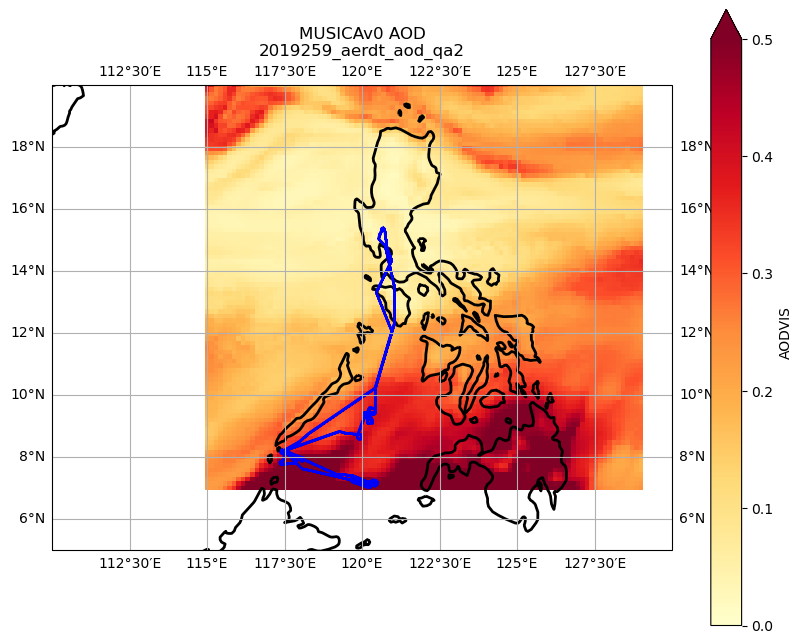

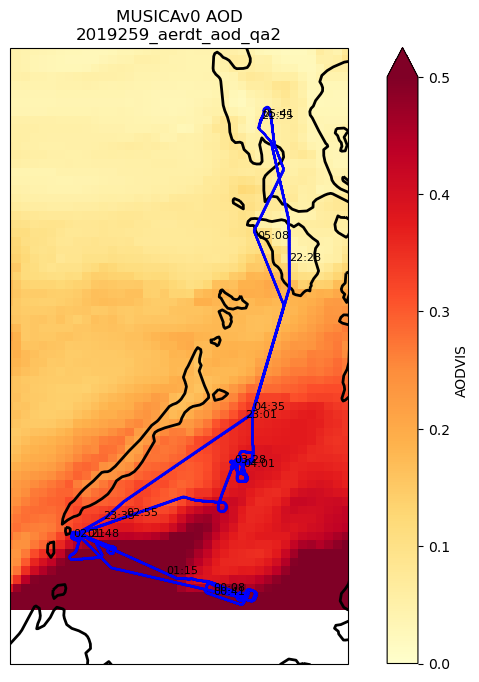

In [14]:


for i in range(0, i_end, 1):
    print(i)
    hh = f"{i:02d}"
    FILE=f"/home/svisaga/clavrx/aerdt/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_aerdt.nc"

    FILE_MUSICAv0 = f"/home/svisaga/MUSICA_ANALYSES/MUSICAv0_regrid/MUSICAv0_p3/MUSICAv0_SEAcut_ne30x16_2019-{month:02}-{day_MUSICAv0:02}-03600.nc"
    
    C_MUSICAv0 = xarray.open_dataset(FILE_MUSICAv0)
    time_ = f'2019-{month:02}-{day_MUSICAv0:02}T{hh}:30:00.000000000'
    C_MUSICAv0 = C_MUSICAv0.sel(time=time_)
    
    aod_musicav0 = C_MUSICAv0['AODVIS']

    #for figure labels
    file_date_str = FILE.split('/')[-1].replace('.nc', '') .split('T')[0].split('_')[2]
    
    if i>0:
        aod_1_model = da_concat_model

    da_concat_model = aod_musicav0

    if i>0:
        dataarrays_model = [aod_1_model, da_concat_model]  
        da_concat_model = xarray.concat(dataarrays_model, dim='new_dim')   
print(da_concat_model)


mean_aod_model = da_concat_model.mean(dim='new_dim', skipna=True)   


########################################################################
########################################################################
########################################################################
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
#ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod_model.plot.pcolormesh(vmin=0,vmax=0.5,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(5,20)
ax.set_xlim(110,130)

ax.coastlines(resolution='50m', color='black', linewidth=2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_{group_name}_ne30x16_flghtrck_daily_aod_model_seacut_nofilter.png',dpi=300)

########################################################################
########################################################################
########################################################################
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
#ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod_model.plot.pcolormesh(vmin=0,vmax=0.5,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(lats.min()-1,lats.max()+1)
ax.set_xlim(lons.min()-1,lons.max()+1)

# Optionally, annotate the track with datetime (only label every 10th point to avoid clutter)
for i in range(0, len(lons), 2000):
    ax.text(lons[i], lats[i], datetimes[i].strftime('%H:%M'), fontsize=8, transform=ccrs.PlateCarree())


ax.coastlines(resolution='50m', color='black', linewidth=2)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_{group_name}_ne30x16_flghtrck_daily_aod_model_seacut_nofilter_v2.png',dpi=300)



# Calculate Daily Mean of Hourly mean AOD

259 aerdt_aod_qa2
259 aerdt_aod_qa2
259 aerdt_aod_qa2
259 aerdt_aod_qa2
259 aerdt_aod_qa2
259 aerdt_aod_qa2
<xarray.DataArray 'aod_Mean' (latitude: 158, longitude: 186)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.10607204, 0.03854859, 0.05510913, ..., 0.49275   , 0.4982    ,
        0.41      ],
       [0.02665278, 0.01879167, 0.10137619, ..., 0.38133333, 0.412375  ,
        0.36575   ],
       [0.00517222, 0.06743016, 0.10936984, ..., 0.40075641, 0.41077273,
        0.3652    ]])
Coordinates:
  * longitude  (longitude) float64 93.94 94.19 94.44 94.69 ... 139.7 140.0 140.2
  * latitude   (latitude) float64 -19.15 -18.9 -18.65 -18.4 ... 19.65 19.9 20.15


"\n    mean_pixelcount = da_concat.count(dim='new_dim')\n    mean_pixelcount = mean_pixelcount.data\n    pcqa_with_coords = xarray.DataArray(\n        data=mean_pixelcount.T,  \n        dims=['latitude', 'longitude'],   # Specify the dimension names\n        coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates\n        name='Pixel_Count'  # You can name the DataArray\n    )\n    \n    fig = plt.figure(figsize=(10, 8))\n    pla_proj = ccrs.PlateCarree()\n    ax = plt.axes(projection=pla_proj)\n\n    longitude_min = 90\n    longitude_max = 140\n    latitude_min = -15  # Adjust as necessary\n    latitude_max = 20   # Adjust as necessary\n    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())\n\n    pcqa_with_coords.where(pcqa_with_coords >=1).plot.pcolormesh(vmin=0,vmax=8,cmap='jet')\n    \n    ax.coastlines(resolution='50m', color='black', linewidth=2)\n    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_in

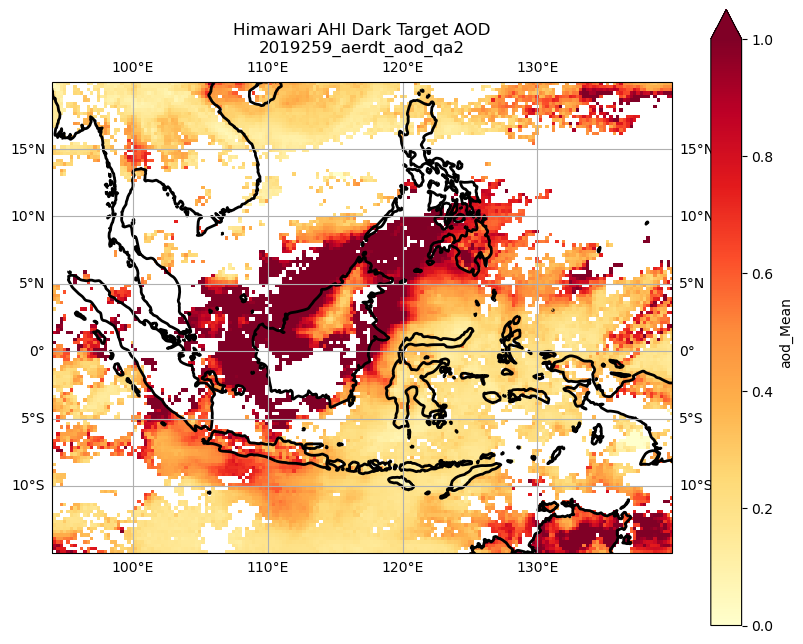

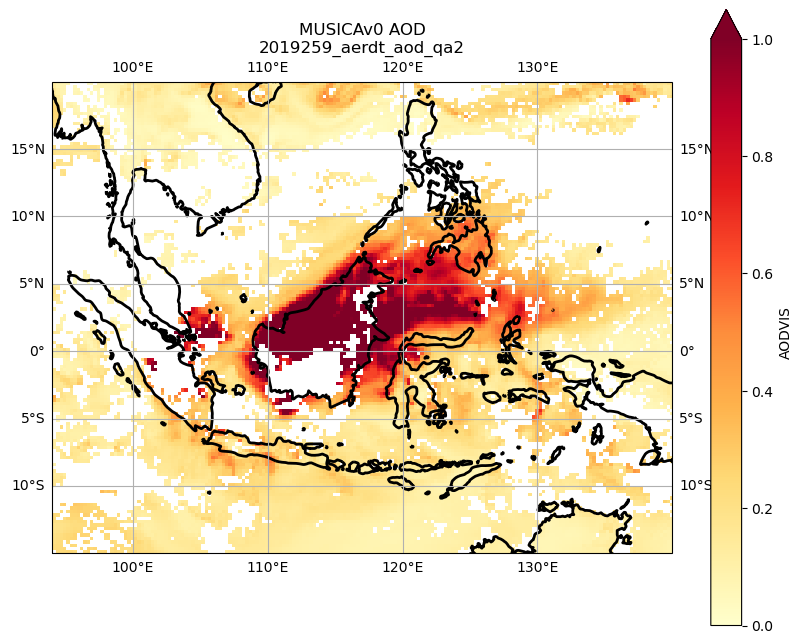

In [16]:
group_name_list = ['aerdt_aod_qa2']
for group_name in group_name_list:
    da_concat = xarray.DataArray([])
    for i in range(0, i_end, 1):
        hh = f"{i:02d}"
        FILE=f"/home/svisaga/clavrx/aerdt/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_aerdt.nc"
        # Open the root group
        C = xarray.open_dataset(FILE)
        # Open a specific group, e.g., 'group_name'
        print(dd, group_name)
        ds_aod = xarray.open_dataset(FILE, group=group_name)

        FILE_MUSICAv0 = f"/home/svisaga/MUSICA_ANALYSES/MUSICAv0_AOD_U_V_regridded/MUSICAv0_AOD_U_V_SEAcut_25km_2019-{month:02}-{day_MUSICAv0:02}-03600.nc"
        
        C_MUSICAv0 = xarray.open_dataset(FILE_MUSICAv0)
        time_ = f'2019-{month:02}-{day_MUSICAv0:02}T{hh}:30:00.000000000'
        C_MUSICAv0 = C_MUSICAv0.sel(time=time_)
        
        aod_musicav0 = C_MUSICAv0['AODVIS']

        #for figure labels
        file_date_str = FILE.split('/')[-1].replace('.nc', '') .split('T')[0].split('_')[2]
        
        if i>0:
            aod_1 = da_concat #save old timestep AOD to aod_1
            aod_1_model = da_concat_model

        da_concat_ = ds_aod['Mean'].data
        longitude = np.linspace(-180, 180, 1440)  # Longitudes from -180 to 180 with 1440 points
        latitude = np.linspace(-90, 90, 720)     # Latitudes from -90 to 90 with 720 points
        da_concat= xarray.DataArray(
            data=da_concat_.T,  # AOD data values
            dims=['latitude', 'longitude'],   # Specify the dimension names
            coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
            name='aod_Mean'  # You can name the DataArray
        )
        da_concat = da_concat.sel(latitude=slice(-19.1516, 20.15299+0.25 ),longitude=slice(93.94024-0.25, 140.22238+0.25))

        for latitude in da_concat.latitude:
            for longitude in da_concat.longitude:
                if np.isnan(da_concat.sel(latitude=latitude, longitude=longitude)):
                    aod_musicav0.loc[dict(lat=latitude, lon=longitude)] = np.nan
        da_concat_model = aod_musicav0

        if i>0:
            dataarrays = [aod_1, da_concat]
            da_concat = xarray.concat(dataarrays, dim='new_dim')   

            dataarrays_model = [aod_1_model, da_concat_model]  
            da_concat_model = xarray.concat(dataarrays_model, dim='new_dim')   

    mean_aod = da_concat.mean(dim='new_dim', skipna=True)
    print(mean_aod)
    mean_aod_model = da_concat_model.mean(dim='new_dim', skipna=True)   
    ########################################################################
    ########################################################################
    ########################################################################
    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 94
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 20   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    mean_aod.where(mean_aod >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')
    
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI Dark Target AOD\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_daily_aod_{group_name}.png',dpi=300)
    ########################################################################
    ########################################################################
    ########################################################################
    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 94
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 20   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    mean_aod_model.plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')
    
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_daily_aod_model_seacut_{group_name}.png',dpi=300)
    
    ########################################################################
    ########################################################################
    ########################################################################
'''
    mean_pixelcount = da_concat.count(dim='new_dim')
    mean_pixelcount = mean_pixelcount.data
    pcqa_with_coords = xarray.DataArray(
        data=mean_pixelcount.T,  
        dims=['latitude', 'longitude'],   # Specify the dimension names
        coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
        name='Pixel_Count'  # You can name the DataArray
    )
    
    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 20   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    pcqa_with_coords.where(pcqa_with_coords >=1).plot.pcolormesh(vmin=0,vmax=8,cmap='jet')
    
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI MURI AOD Pixel Count\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_daily_aodpixelcount_{group_name}.png',dpi=300)
'''    

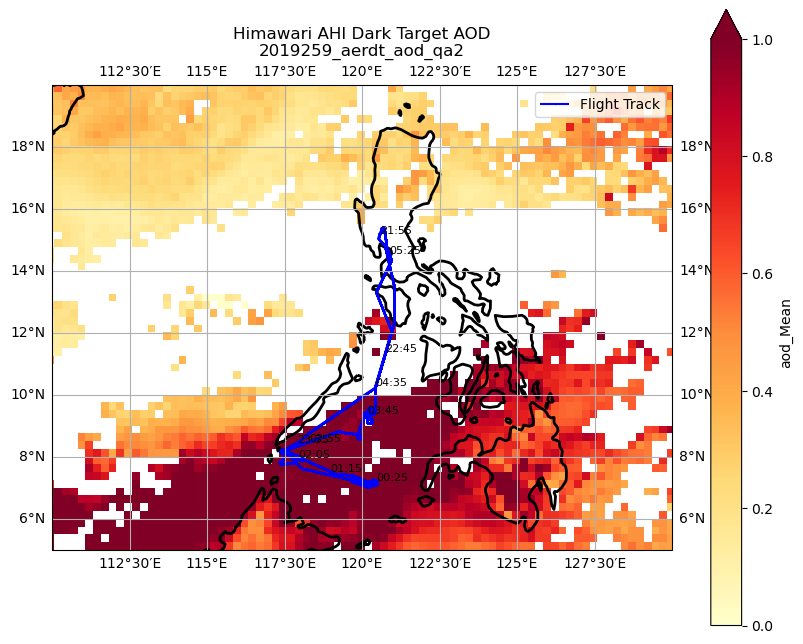

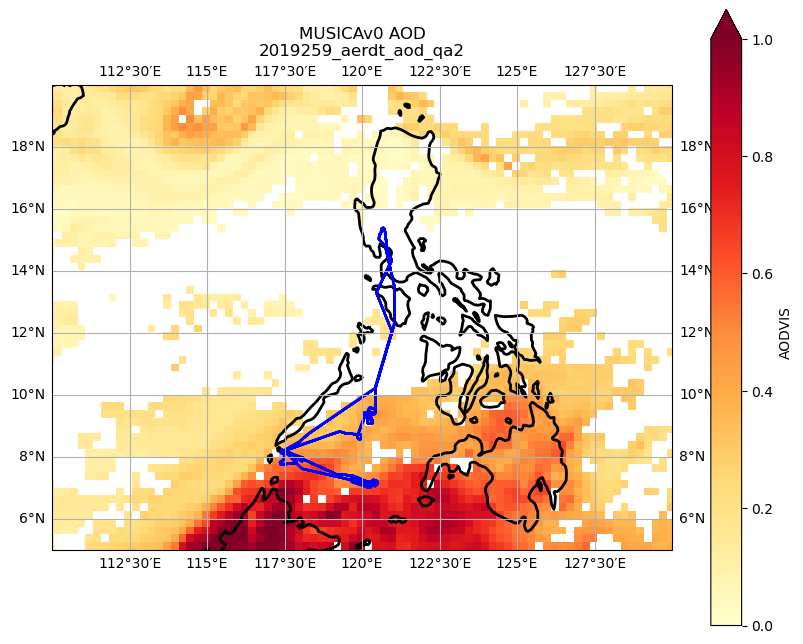

In [17]:
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod.where(mean_aod >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(5,20)
ax.set_xlim(110,130)

ax.coastlines(resolution='50m', color='black', linewidth=2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Optionally, annotate the track with datetime (only label every 10th point to avoid clutter)
for i in range(0, len(lons), 3000):
    ax.text(lons[i], lats[i], datetimes[i].strftime('%H:%M'), fontsize=8, transform=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Flight Track {file_date_str}')
plt.legend()

plt.title(f'Himawari AHI Dark Target AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_flghtrk_daily_aod_{group_name}.png',dpi=300)

########################################################################
########################################################################
########################################################################
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod_model.plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(5,20)
ax.set_xlim(110,130)


ax.coastlines(resolution='50m', color='black', linewidth=2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_flghtrk_daily_aod_model_seacut_{group_name}.png',dpi=300)


# Add flight track here.

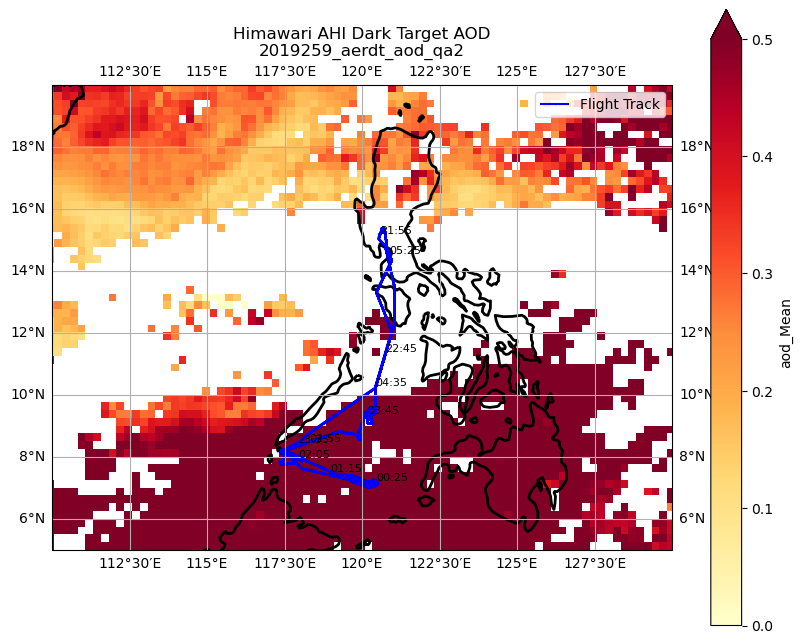

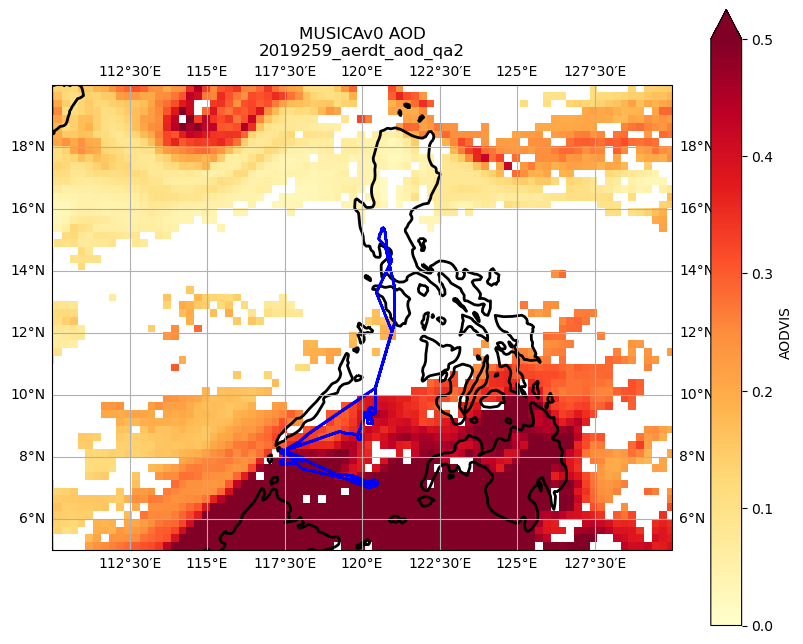

In [18]:

fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod.where(mean_aod >=0).plot.pcolormesh(vmin=0,vmax=0.5,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(5,20)
ax.set_xlim(110,130)

ax.coastlines(resolution='50m', color='black', linewidth=2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Optionally, annotate the track with datetime (only label every 10th point to avoid clutter)
for i in range(0, len(lons), 3000):
    ax.text(lons[i], lats[i], datetimes[i].strftime('%H:%M'), fontsize=8, transform=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Flight Track {file_date_str}')
plt.legend()

plt.title(f'Himawari AHI Dark Target AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_flghtrk_daily_aod_{group_name}.png',dpi=300)

########################################################################
########################################################################
########################################################################
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod_model.plot.pcolormesh(vmin=0,vmax=0.5,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(5,20)
ax.set_xlim(110,130)


ax.coastlines(resolution='50m', color='black', linewidth=2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_flghtrk_daily_aod_model_seacut_{group_name}_v2.png',dpi=300)


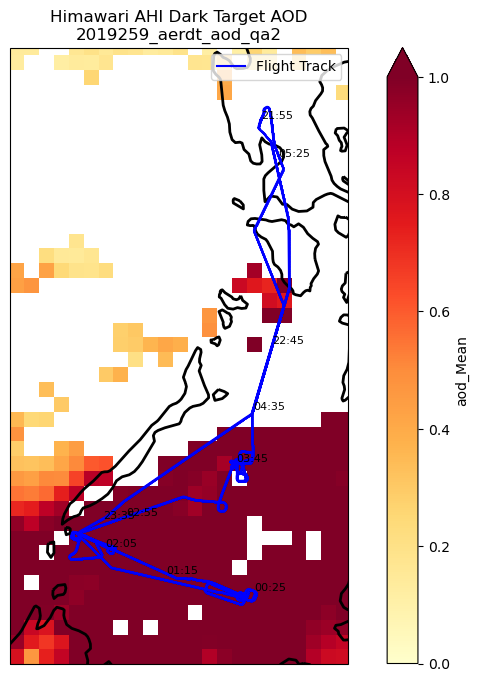

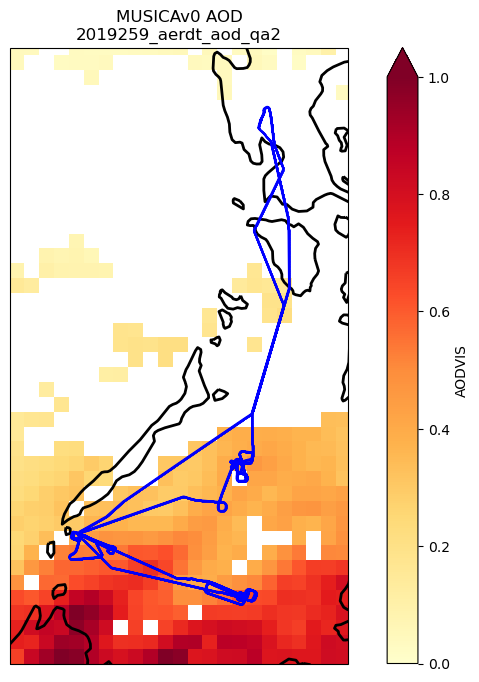

In [19]:

fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod.where(mean_aod >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(lats.min()-1,lats.max()+1)
ax.set_xlim(lons.min()-1,lons.max()+1)

ax.coastlines(resolution='50m', color='black', linewidth=2)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Optionally, annotate the track with datetime (only label every 10th point to avoid clutter)
for i in range(0, len(lons), 3000):
    ax.text(lons[i], lats[i], datetimes[i].strftime('%H:%M'), fontsize=8, transform=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Flight Track {file_date_str}')
plt.legend()

plt.title(f'Himawari AHI Dark Target AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_flghtrk_daily_aod_{group_name}_v2.png',dpi=300)

########################################################################
########################################################################
########################################################################
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod_model.plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')

# Plot the flight track on the map
ax.plot(lons, lats, color='blue', marker='o', markersize=0.1, transform=ccrs.PlateCarree(), label='Flight Track')
ax.set_ylim(lats.min()-1,lats.max()+1)
ax.set_xlim(lons.min()-1,lons.max()+1)

ax.coastlines(resolution='50m', color='black', linewidth=2)
#ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_flghtrk_daily_aod_model_seacut_{group_name}_v2.png',dpi=300)


ValueError: DataArray must be 2d

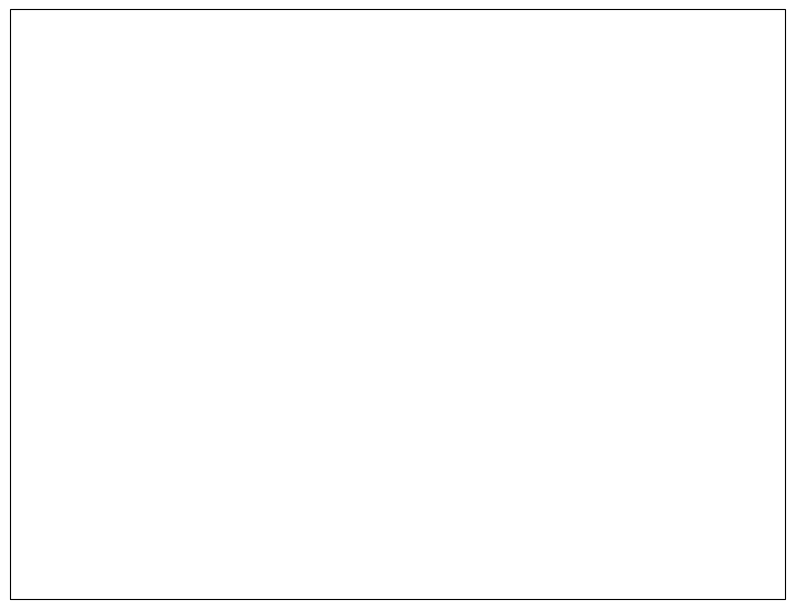

In [ ]:
for latitude in mean_aod.latitude:
    for longitude in mean_aod.longitude:
           if np.isnan(mean_aod.sel(latitude=latitude, longitude=longitude)):
               mean_aod_diff = mean_aod_model-mean_aod
                    
########################################################################
########################################################################
########################################################################
fig = plt.figure(figsize=(10, 8))
pla_proj = ccrs.PlateCarree()
ax = plt.axes(projection=pla_proj)

longitude_min = 94
longitude_max = 140
latitude_min = -15  # Adjust as necessary
latitude_max = 20   # Adjust as necessary
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

mean_aod_diff.plot.pcolormesh(vmin=-1,vmax=1,cmap='bwr')

ax.coastlines(resolution='50m', color='black', linewidth=2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
plt.savefig(f'img/{file_date_str}_daily_aod_model_diff_seacut_{group_name}.png',dpi=300)

In [ ]:
    mean_aod = mean_aod.data

    lat_points = 158 
    lon_points = 186
    loni = 93.94023627519107
    lone = 140.22237665045168
    longitude_ = np.linspace(loni,lone,lon_points)
    lati = -19.15159944367177
    late = 20.152990264255905
    latitude_ = np.linspace(lati,late,lat_points)

    aodqa_with_coords = xarray.DataArray(
        data=mean_aod.T,  # AOD data values
        dims=['latitude', 'longitude'],   # Specify the dimension names
        coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
        name='aod_Mean'  # You can name the DataArray
    )



    mean_aod_model = da_concat_model.mean(dim='new_dim', skipna=True)
    mean_aod_model = mean_aod_model.data
    aod_model_with_coords = xarray.DataArray(
        data=mean_aod_model.T,  # AOD data values
        dims=['latitude', 'longitude'],   # Specify the dimension names
        coords={'longitude': longitude_, 'latitude': latitude_},  # Assign coordinates
        name='aod_musicav0'  # You can name the DataArray
    )


    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    aodqa_with_coords.where(aodqa_with_coords >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')
    
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI MURI AOD\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_daily_aod_{group_name}.png',dpi=300)
    
    ########################################################################
    ########################################################################
    ########################################################################
    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 94
    longitude_max = 135
    latitude_min = -10  # Adjust as necessary
    latitude_max = 20   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    da_concat_model.where(aodqa_with_coords >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='YlOrRd')
    
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'MUSICAv0 AOD\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_daily_aod_model_seacut_{group_name}.png',dpi=300)
    
    ########################################################################
    ########################################################################
    ########################################################################
    '''
    mean_pixelcount = da_concat.count(dim='new_dim')
    mean_pixelcount = mean_pixelcount.data
    pcqa_with_coords = xarray.DataArray(
        data=mean_pixelcount.T,  
        dims=['latitude', 'longitude'],   # Specify the dimension names
        coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
        name='Pixel_Count'  # You can name the DataArray
    )
    
    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    pcqa_with_coords.where(pcqa_with_coords >=1).plot.pcolormesh(vmin=0,vmax=8,cmap='jet')
    
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI MURI AOD Pixel Count\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_daily_aodpixelcount_{group_name}.png',dpi=300)
    '''

NameError: name 'mean_aod' is not defined

# Get Daily Average Cloud Fraction

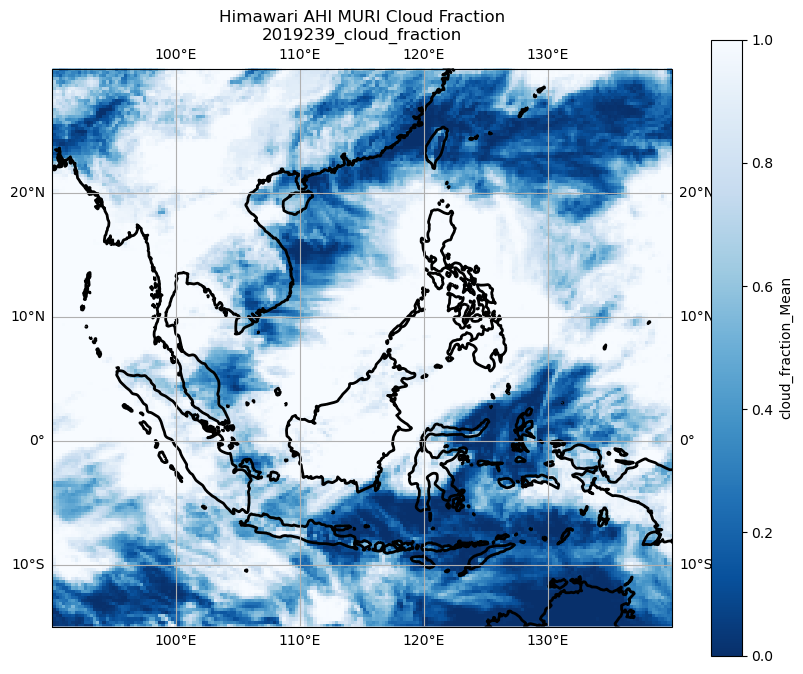

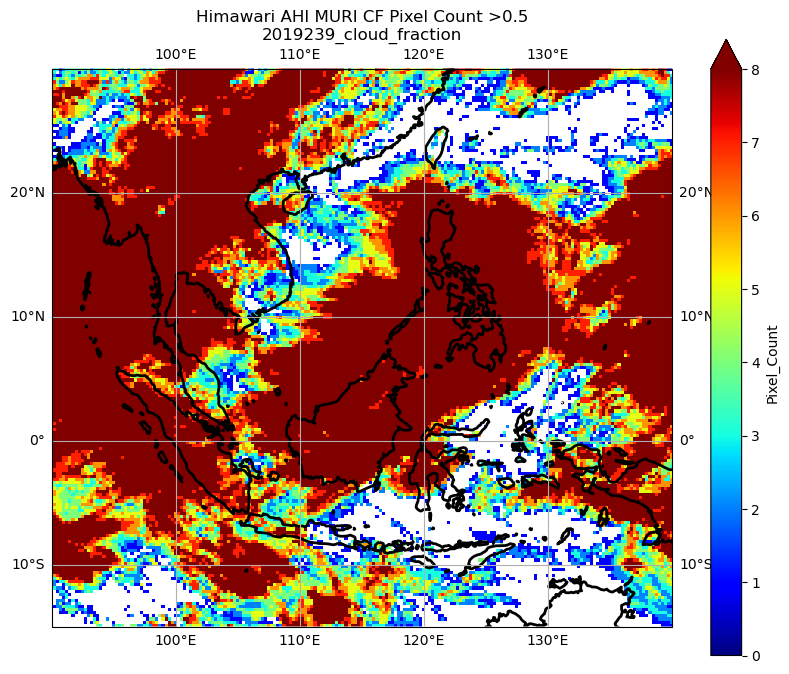

In [ ]:

group_name_list = ['cloud_fraction']
for group_name in group_name_list:
    da_concat = xarray.DataArray([])
    for i in range(0, 9, 1):
        hh = f"{i:02d}"
        FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_muri.nc"

        ds_cf = xarray.open_dataset(FILE, group=group_name)
        #for figure labels
        file_date_str = FILE.split('/')[-1].replace('.nc', '') .split('T')[0].split('_')[2]
        
        if i>0:
            cf_1 = da_concat #save old timestep CF to cf_1
        da_concat = ds_cf['Mean']
        if i>0:
            dataarrays = [cf_1, da_concat]
            da_concat = xarray.concat(dataarrays, dim='new_dim')  
    mean_cf = da_concat.mean(dim='new_dim', skipna=True)
    mean_cf = mean_cf.data
    cf_with_coords = xarray.DataArray(
    data=mean_cf.T,  # Cloud Fraction data values
    dims=['latitude', 'longitude'],   # Specify the dimension names
    coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
    name='cloud_fraction_Mean'  # You can name the DataArray
    )

    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    cf_with_coords.where(cf_with_coords >=0).plot.pcolormesh(vmin=0,vmax=1,cmap='Blues_r')
    
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI MURI Cloud Fraction\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_daily_cf_{group_name}.png',dpi=300)
    
    ########################################################################
    ########################################################################
    ########################################################################
    #mean_pixelcount = da_concat.count(dim='new_dim')
    mean_pixelcount = (da_concat>0.5).sum(dim='new_dim')
    mean_pixelcount = mean_pixelcount.data
    pcqa_with_coords = xarray.DataArray(
        data=mean_pixelcount.T,  
        dims=['latitude', 'longitude'],   # Specify the dimension names
        coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
        name='Pixel_Count'  # You can name the DataArray
    )
    
    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    pcqa_with_coords.where(pcqa_with_coords >=1).plot.pcolormesh(vmin=0,vmax=8,cmap='jet')
    
    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI MURI CF Pixel Count >0.5\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_daily_cfpixelcount_{group_name}.png',dpi=300)

# Cloud Fraction, hourly

cloud_fraction


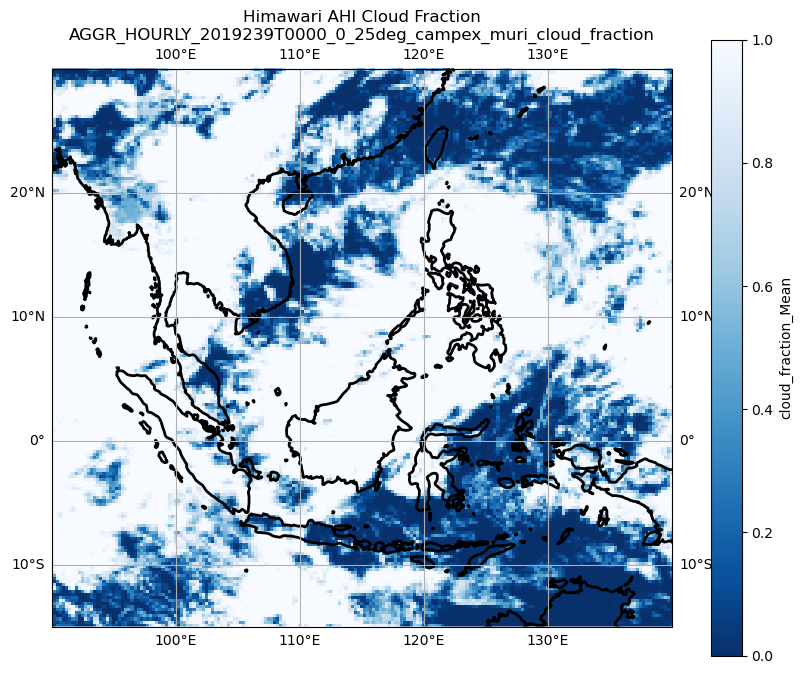

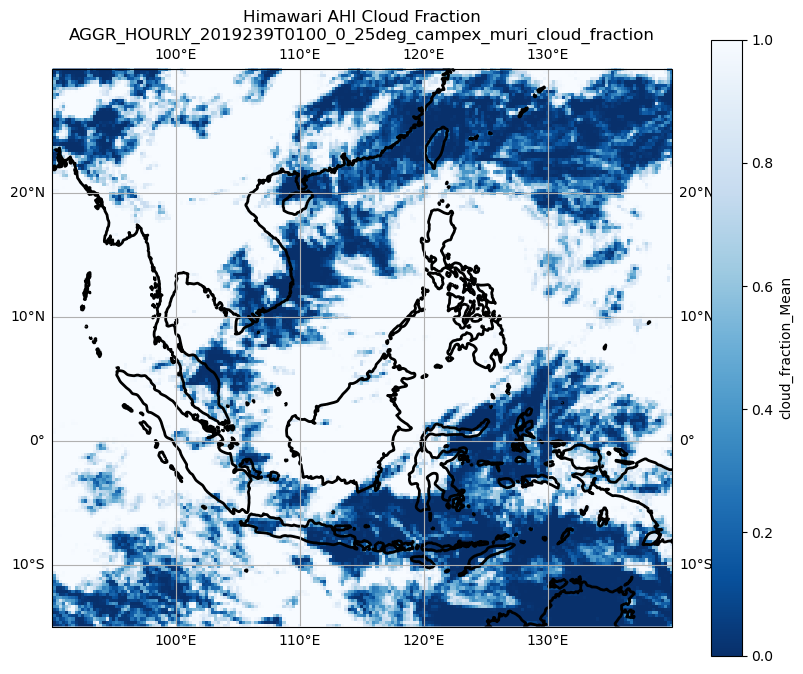

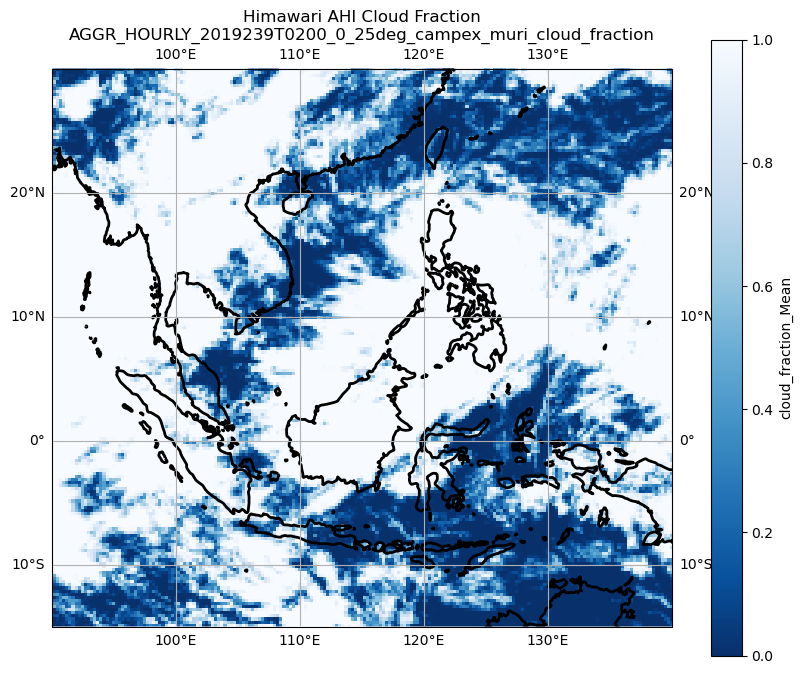

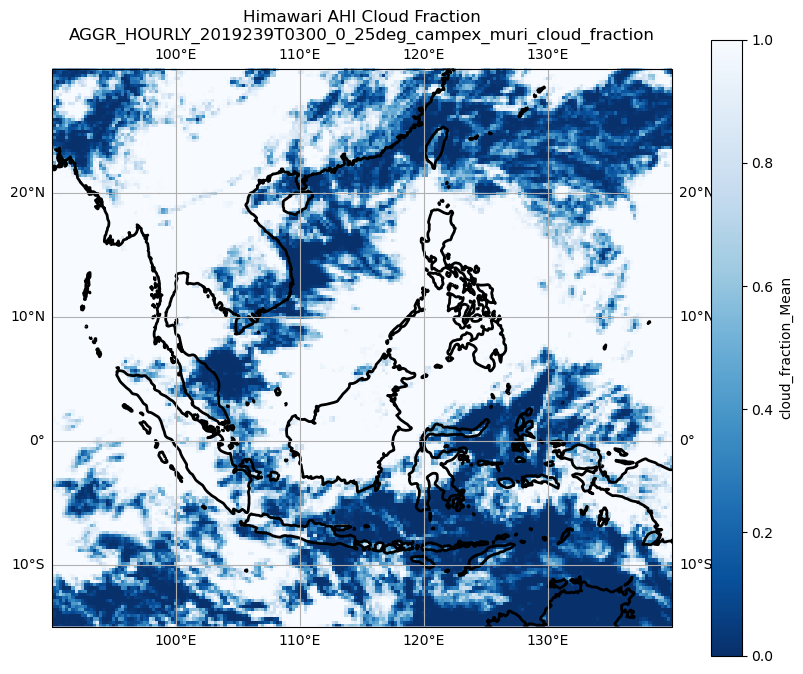

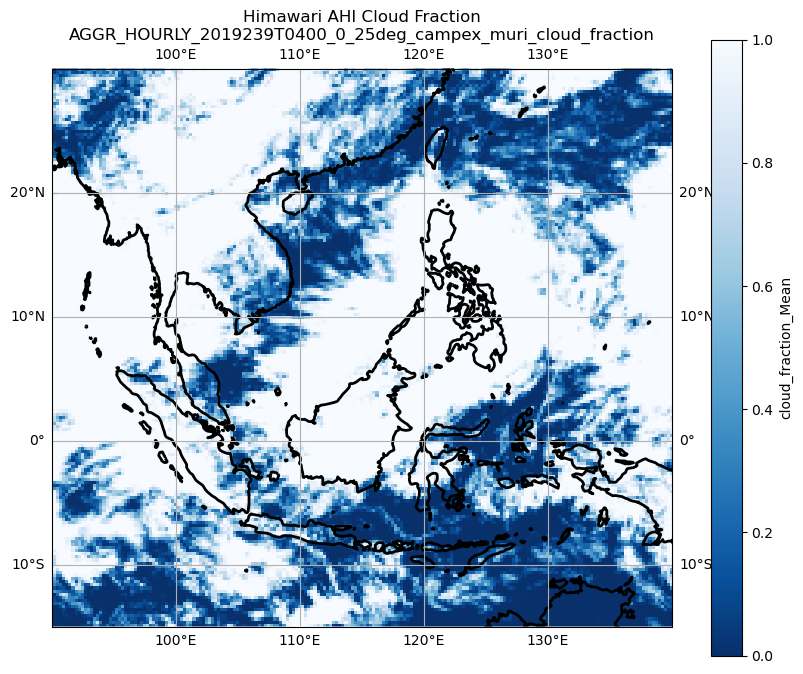

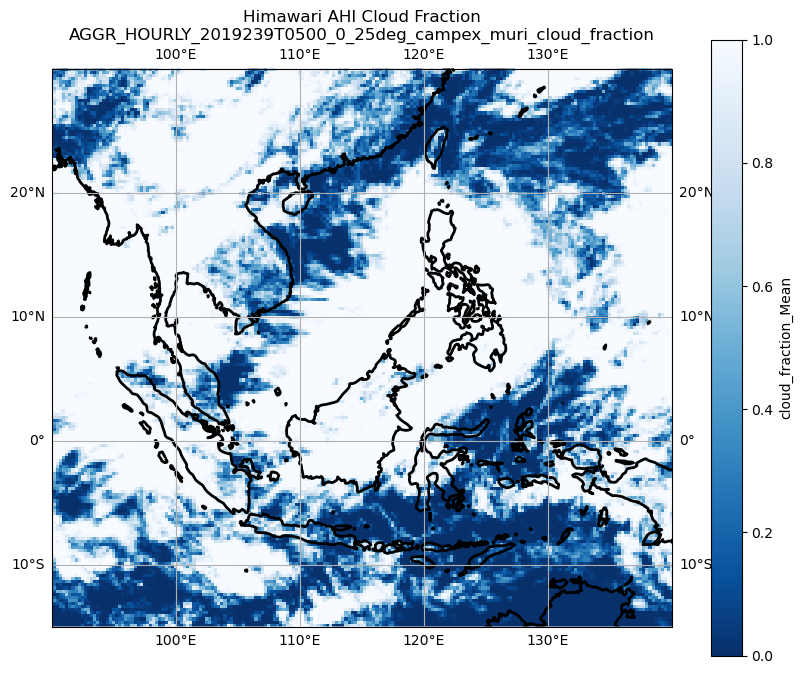

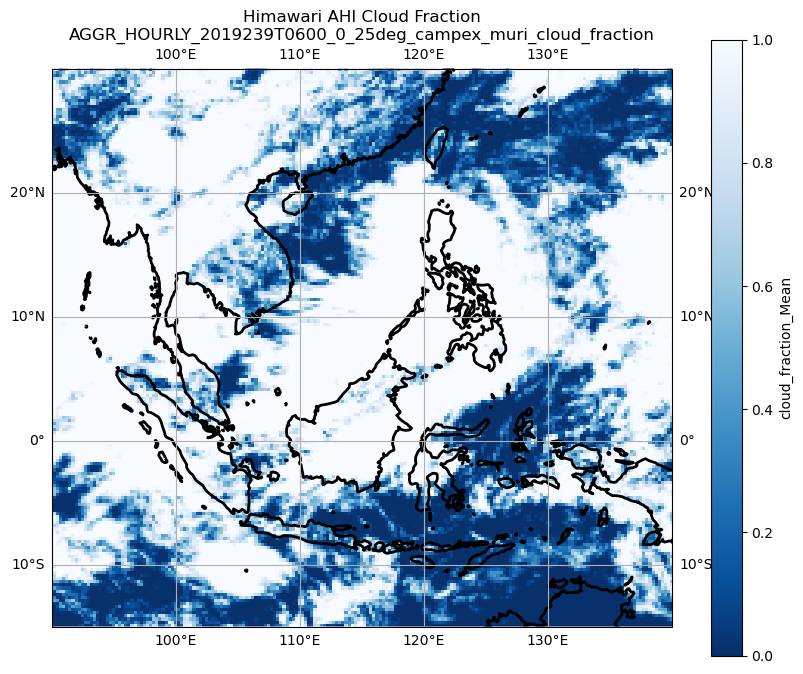

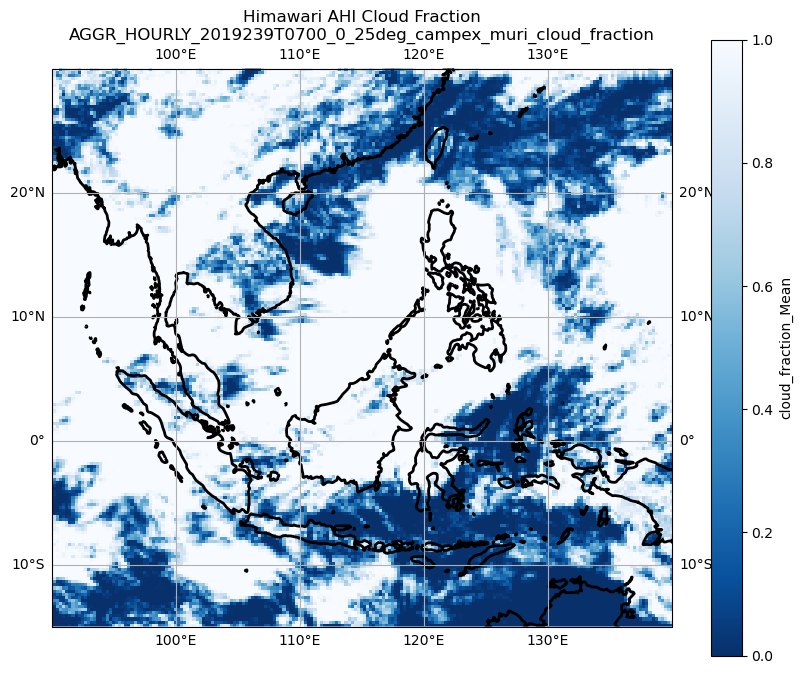

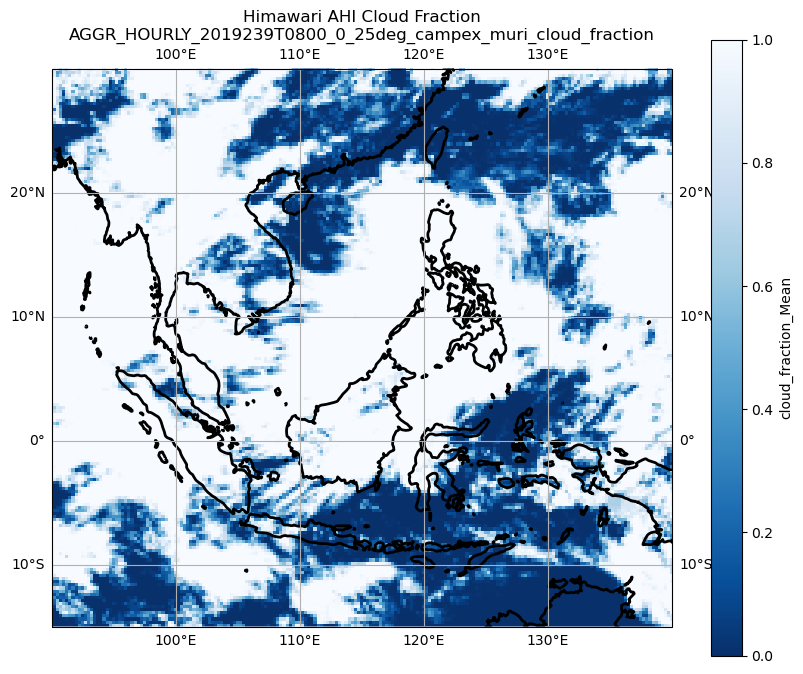

In [ ]:
group_name = 'cloud_fraction'
# Open a specific group, e.g., 'group_name'
print(group_name)
for i in range(0, 9, 1):
    hh = f"{i:02d}"
    FILE=f"/home/svisaga/clavrx/muri/AGGR_HOURLY_2019{dd:03}T{hh}00_0_25deg_campex_muri.nc"
    ds_cf = xarray.open_dataset(FILE, group=group_name)
    file_date_str = FILE.split('/')[-1].replace('.nc', '') 
    cf = ds_cf.Mean.values
    cf_with_coords = xarray.DataArray(
        data=cf.T,  # Cloud Fraction data values
        dims=['latitude', 'longitude'],   # Specify the dimension names
        coords={'longitude': longitude, 'latitude': latitude},  # Assign coordinates
        name='cloud_fraction_Mean'  # You can name the DataArray
    )

    fig = plt.figure(figsize=(10, 8))
    pla_proj = ccrs.PlateCarree()
    ax = plt.axes(projection=pla_proj)

    longitude_min = 90
    longitude_max = 140
    latitude_min = -15  # Adjust as necessary
    latitude_max = 30   # Adjust as necessary
    ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max], crs=ccrs.PlateCarree())

    cf_with_coords.plot.pcolormesh(vmin=0,vmax=1,cmap='Blues_r')

    ax.coastlines(resolution='50m', color='black', linewidth=2)
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    plt.title(f'Himawari AHI Cloud Fraction\n{file_date_str}_{group_name}')
    plt.savefig(f'img/{file_date_str}_cloudfraction_{group_name}.png',dpi=300)

# FRP Aggregate here
### I have a SEA-MC subset of AHI_2019_/ in my local computer. 
### It is located at a AHI_SEA_2019_/ folder. It includes regridded-to-25km coords.

In [ ]:
#loop through files
'''
df = []
print(dd)
for filepath in glob.iglob(f'AHI_2019_/f2019{dd}{hh}*.txt'):
    data = pd.read_csv(filepath, skiprows=44).iloc[1:]
    data = data.astype('float')
    data['file'] = os.path.basename(filepath)
    df.append(data)
df = pd.concat(df)

df = df.replace(-9999,np.NaN)
df['Year'] = df['file'].str.slice(1, 5).astype('int')
df['Day'] = df['file'].str.slice(5, 8).astype('int')
df['Hour'] = df['file'].str.slice(8, 10).astype('str')
df['Min'] = df['file'].str.slice(10, 12).astype('str')
df.columns = ['Latitude', 'Longitude', 'Code', 'FRP', 'Fire Size',
           'Fire Temp', 'Line', 'Element', 'Pixel Size', 'Obs BT4',
           'Obs BT11', 'Bkg BT4', 'Bkg BT11', 'SolZen', 'SatZen',
           'RelAzi', 'Eco', 'FD_X', 'FD_Y','file','Year','Day','Hour','Min']
df = df[['Latitude', 'Longitude', 'Code', 'FRP', 'Fire Size',
           'Fire Temp', 'Line', 'Element', 'Pixel Size', 'Obs BT4',
           'Obs BT11', 'Bkg BT4', 'Bkg BT11', 'SolZen', 'SatZen',
           'RelAzi', 'Eco', 'FD_X', 'FD_Y','Year','Day','Hour','Min']]

###    Code: 10 (30) - Processed Fire Pixel (Temporally filtered)
###          11 (31) - Saturated Fire Pixel (Temporally filtered)
###          12 (32) - Cloudy Fire Pixel (Temporally filtered)
###          13 (33) - High Probability Fire Pixel (Temporally filtered)
###          14 (34) - Medium Probability Fire Pixel (Temporally filtered)
###          15 (35) - Low Probability Fire Pixel (Temporally filtered)
###    FRP: Fire Radiative Power [MW] (when available)


df_SEA_code10 = df[df['Code']==10]
df_SEA_code11 = df[df['Code']==11]
df_SEA_code12 = df[df['Code']==12]
'''

"\ndf = []\nprint(dd)\nfor filepath in glob.iglob(f'AHI_2019_/f2019{dd}{hh}*.txt'):\n    data = pd.read_csv(filepath, skiprows=44).iloc[1:]\n    data = data.astype('float')\n    data['file'] = os.path.basename(filepath)\n    df.append(data)\ndf = pd.concat(df)\n\ndf = df.replace(-9999,np.NaN)\ndf['Year'] = df['file'].str.slice(1, 5).astype('int')\ndf['Day'] = df['file'].str.slice(5, 8).astype('int')\ndf['Hour'] = df['file'].str.slice(8, 10).astype('str')\ndf['Min'] = df['file'].str.slice(10, 12).astype('str')\ndf.columns = ['Latitude', 'Longitude', 'Code', 'FRP', 'Fire Size',\n           'Fire Temp', 'Line', 'Element', 'Pixel Size', 'Obs BT4',\n           'Obs BT11', 'Bkg BT4', 'Bkg BT11', 'SolZen', 'SatZen',\n           'RelAzi', 'Eco', 'FD_X', 'FD_Y','file','Year','Day','Hour','Min']\ndf = df[['Latitude', 'Longitude', 'Code', 'FRP', 'Fire Size',\n           'Fire Temp', 'Line', 'Element', 'Pixel Size', 'Obs BT4',\n           'Obs BT11', 'Bkg BT4', 'Bkg BT11', 'SolZen', 'SatZen',\n   

In [ ]:
'''df_SEA_code10'''

'df_SEA_code10'